#Predicting Financial Fraud
Preventing financial fraud is a critical concern for financial institutions as it can cause significant losses for both the institution and its customers. Predicting fraudulent activities can help banks and financial institutions develop more effective risk management strategies, such as strengthening their security measures, identifying high-risk accounts, and implementing fraud detection tools.

Using machine learning algorithms, financial institutions can analyze a wide range of factors, such as transaction history, account activity, and customer behavior, to detect patterns that may indicate fraudulent activity. With Gradient Boosting algorithms, we can create a predictive model that can accurately identify fraudulent transactions, helping institutions take proactive measures to prevent financial losses.

In [1]:
#importing relevant libraries
import pandas as pd #for data
import numpy as np #for numercial operations
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import warnings #for ignoring warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split #splitting the data into train and test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, f1_score, precision_score #metrics for efficiency tracking
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('/content/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
df.shape

(6362620, 11)

We have total 6362620 rows and 10 columns.


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In this dataset there is no null value.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Let's change some column names for better undestanding.

In [8]:
df.rename(columns={'step':'Step',
                   'type':'Type',
                   'amount':'Amount',
                   'nameOrig':'Sender_Id',
                   'oldbalanceOrg':'Sender_Bal_Before',
                   'newbalanceOrig':'Sender_Bal_After',
                   'nameDest':'Receiver_Id',
                   'oldbalanceDest':'Receiver_Bal_Before',
                   'newbalanceDest':'Receiver_Bal_After',
                   'isFraud':'Fraud',
                   'isFlaggedFraud':'Flagged_Fraud'}, inplace=True)

In [9]:
df.head()

,Step,Type,Amount,Sender_Id,Sender_Bal_Before,Sender_Bal_After,Receiver_Id,Receiver_Bal_Before,Receiver_Bal_After,Fraud,Flagged_Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


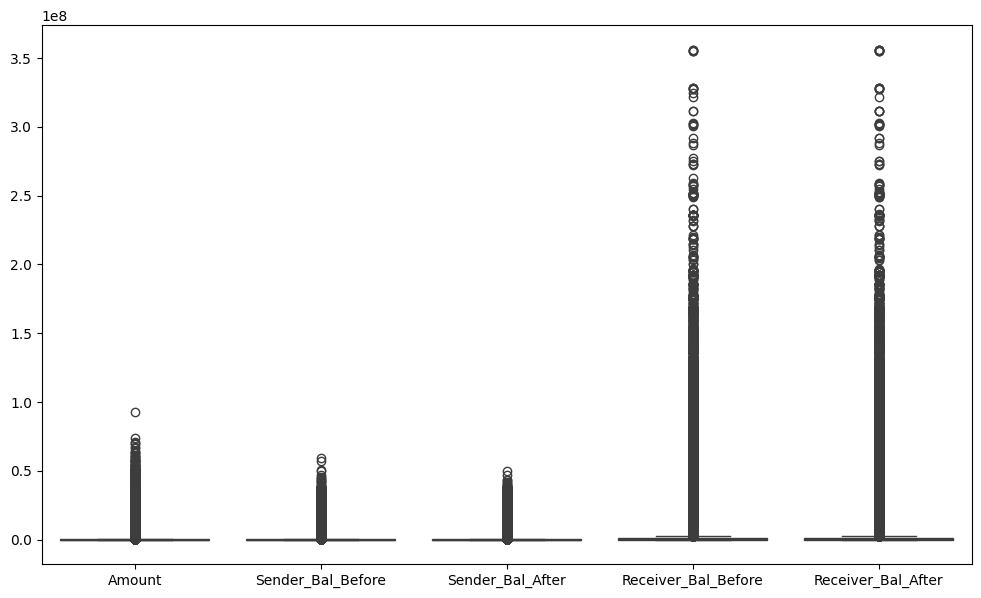

In [10]:
# lets detect outliers in the numerical columns

plt.figure(figsize=(12,7))
sns.boxplot(df[['Amount','Sender_Bal_Before','Sender_Bal_After','Receiver_Bal_Before','Receiver_Bal_After']])
plt.show()

There are several outliers in the dataset.

We can see that there are very high amount of outliers present in the reveivers balances columns. Therefore, there high chances of anomalies inside the transactions.

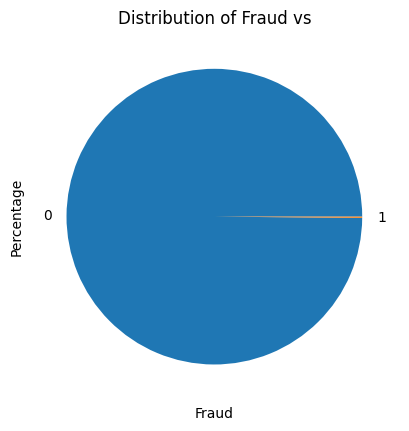

In [11]:
distribution_fraud = df['Fraud'].value_counts(normalize=True)
distribution_fraud.plot(kind = 'pie')
plt.xlabel('Fraud')
plt.ylabel('Percentage')
plt.title('Distribution of Fraud vs')
plt.show()

In [12]:
df['Fraud'].value_counts()

,count
Fraud,
0,6354407
1,8213


In [13]:
percentage_of_fraud = df['Fraud'].value_counts()/df['Fraud'].count()*100
percentage_of_fraud


,count
Fraud,
0,99.870918
1,0.129082


Among all the transactions in dataset, there are only 0.12% of fraud transaction, which is almost 8213 out of 6362620 transaction.

In [14]:
encoded_df = pd.get_dummies(df,columns=['Type'])


encoded_df.head()

,Step,Amount,Sender_Id,Sender_Bal_Before,Sender_Bal_After,Receiver_Id,Receiver_Bal_Before,Receiver_Bal_After,Fraud,Flagged_Fraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


In [15]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Step                 int64  
 1   Amount               float64
 2   Sender_Id            object 
 3   Sender_Bal_Before    float64
 4   Sender_Bal_After     float64
 5   Receiver_Id          object 
 6   Receiver_Bal_Before  float64
 7   Receiver_Bal_After   float64
 8   Fraud                int64  
 9   Flagged_Fraud        int64  
 10  Type_CASH_IN         bool   
 11  Type_CASH_OUT        bool   
 12  Type_DEBIT           bool   
 13  Type_PAYMENT         bool   
 14  Type_TRANSFER        bool   
dtypes: bool(5), float64(5), int64(3), object(2)
memory usage: 515.8+ MB


In [16]:
numerical_df = encoded_df.drop(['Sender_Id','Receiver_Id'],axis=1)

correlation_matrix = numerical_df.corr()
correlation_matrix

,Step,Amount,Sender_Bal_Before,Sender_Bal_After,Receiver_Bal_Before,Receiver_Bal_After,Fraud,Flagged_Fraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
Step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.004077,-0.012918,0.002869,0.004926,0.006925
Amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.009621,-0.004376,-0.023379,-0.197444,0.365896
Sender_Bal_Before,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,0.506761,-0.200899,-0.021450,-0.189486,-0.081593
Sender_Bal_After,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,0.527373,-0.210977,-0.021872,-0.193915,-0.087355
Receiver_Bal_Before,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.076105,0.086028,0.009347,-0.231455,0.130476
Receiver_Bal_After,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.034988,0.093476,0.006346,-0.238315,0.191701
Fraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,-0.019089,0.011256,-0.002911,-0.025697,0.053869
Flagged_Fraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.000842,-0.001168,-0.000128,-0.001133,0.005245
Type_CASH_IN,0.004077,-0.009621,0.506761,0.527373,0.076105,0.034988,-0.019089,-0.000842,1.000000,-0.391047,-0.042987,-0.379522,-0.160535
Type_CASH_OUT,-0.012918,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,-0.001168,-0.391047,1.000000,-0.059625,-0.526422,-0.222672


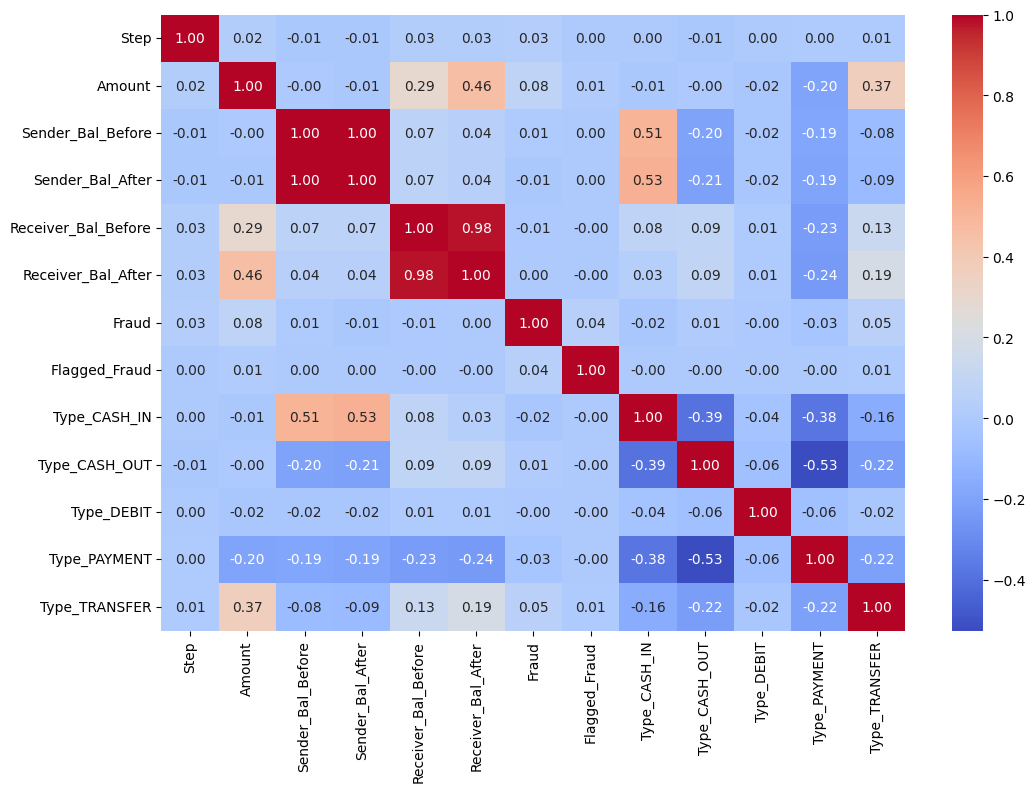

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt='.2f')
plt.show()

The correlation analysis reveals that most features in the dataset have weak linear relationships with the target variable, Fraud. This suggests that no single feature strongly predicts fraudulent transactions. Strong correlations are observed between certain features, such as the sender's and receiver's balances before and after transactions, indicating redundancy that may need to be addressed in feature selection. The weak correlations between transaction types and Fraud imply the need for more complex modeling techniques to capture non-linear interactions and relationships, which are likely to be more effective for fraud detection.

#Fraud Across Transaction Types

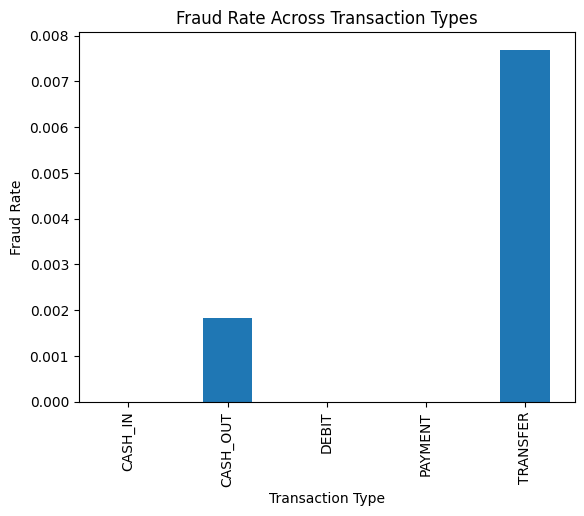

In [18]:
fraud_by_type= df.groupby(['Type'])['Fraud'].mean()
fraud_by_type.plot(kind='bar')
plt.title('Fraud Rate Across Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

We can see that there are significance amount of transaction in CASH_OUT and TRANSFER which are notified as a fraud. Also, the number of fraud in TRANSFER is relativily high.

#Analysing Amounts

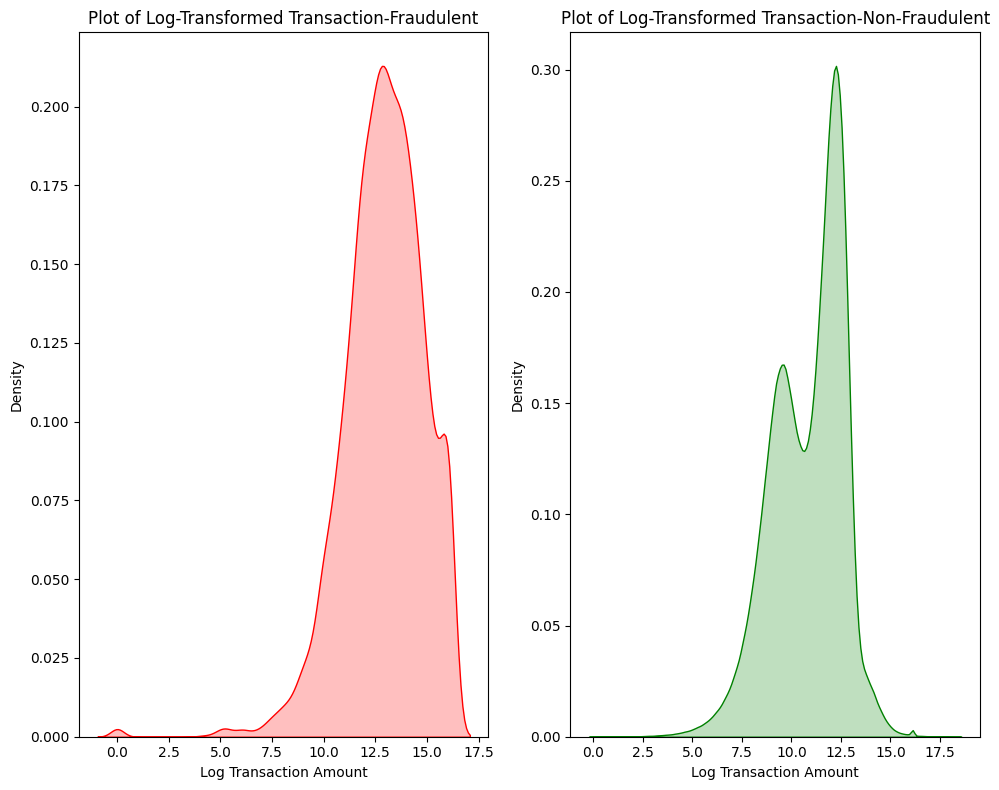

In [19]:
plt.figure(figsize=(10,8))
df['log_amount'] = np.log1p(df['Amount'])

plt.subplot(1, 2, 1)
sns.kdeplot(df[df['Fraud'] == 1]['log_amount'], fill=True, color='red')
plt.title('Plot of Log-Transformed Transaction-Fraudulent')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Density')

# Density plot for Non-Fraudulent Transactions
plt.subplot(1, 2, 2)
sns.kdeplot(df[df['Fraud'] == 0]['log_amount'], fill=True, color='green')
plt.title('Plot of Log-Transformed Transaction-Non-Fraudulent')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Fraudulent Transactions:
The density plot for fraudulent transactions (left plot) is concentrated around the log-transformed transaction amounts of approximately 12 to 15. This suggests that most fraudulent transactions tend to have higher transaction amounts when log-transformed, indicating that fraudsters might be targeting larger sums of money.

Non-Fraudulent Transactions:
The density plot for non-fraudulent transactions (right plot) shows a more varied distribution, with peaks around 10 to 13 on the log-transformed scale. This distribution indicates that non-fraudulent transactions occur across a wider range of transaction amounts, but still tend to cluster around a particular range, similar to fraudulent ones but with more variability.

In [20]:
# Example of creating a high transaction amount flag
amount_threshold = df['Amount'].quantile(0.95)
df['high_amount_flag'] = df['Amount'].apply(lambda x: 1 if x > amount_threshold else 0)

# Log transformation of the amount
df['log_amount'] = np.log(df['Amount'] + 1)

# Create a large balance change flag
balance_change_threshold = df['Sender_Bal_After'] - df['Sender_Bal_Before'].quantile(0.95)
df['large_balance_change_flag'] = ((df['Sender_Bal_After'] - df['Sender_Bal_Before']) > balance_change_threshold).astype(int)

# Balance change ratio
df['balance_change_ratio'] = (df['Sender_Bal_After'] - df['Sender_Bal_Before']) / df['Sender_Bal_Before']

# Frequency of transactions
df['Transaction_count'] = df.groupby('Sender_Id')['Amount'].transform('count')
high_frequency_threshold = df['Transaction_count'].quantile(0.95)
df['high_frequency_flag'] = (df['Transaction_count'] > high_frequency_threshold).astype(int)

In [21]:
df.head()

,Step,Type,Amount,Sender_Id,Sender_Bal_Before,Sender_Bal_After,Receiver_Id,Receiver_Bal_Before,Receiver_Bal_After,Fraud,Flagged_Fraud,log_amount,high_amount_flag,large_balance_change_flag,balance_change_ratio,Transaction_count,high_frequency_flag
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9.194276,0,1,-0.057834,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,7.531166,0,1,-0.087735,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,5.204007,0,1,-1.000000,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,5.204007,0,1,-1.000000,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,9.364703,0,1,-0.280795,1,0


In [22]:
df.describe()

,Step,Amount,Sender_Bal_Before,Sender_Bal_After,Receiver_Bal_Before,Receiver_Bal_After,Fraud,Flagged_Fraud,log_amount,high_amount_flag,large_balance_change_flag,balance_change_ratio,Transaction_count,high_frequency_flag
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,4.273635e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,1.084087e+01,5.000000e-02,9.500000e-01,inf,1.002932e+00,2.925053e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,1.814509e+00,2.179450e-01,2.179450e-01,NaN,5.420031e-02,5.400461e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.502306e+00,0.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,1.122355e+01,0.000000e+00,1.000000e+00,-1.914552e-01,1.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.224876e+01,0.000000e+00,1.000000e+00,2.132092e-02,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.834213e+01,1.000000e+00,1.000000e+00,inf,3.000000e+00,1.000000e+00


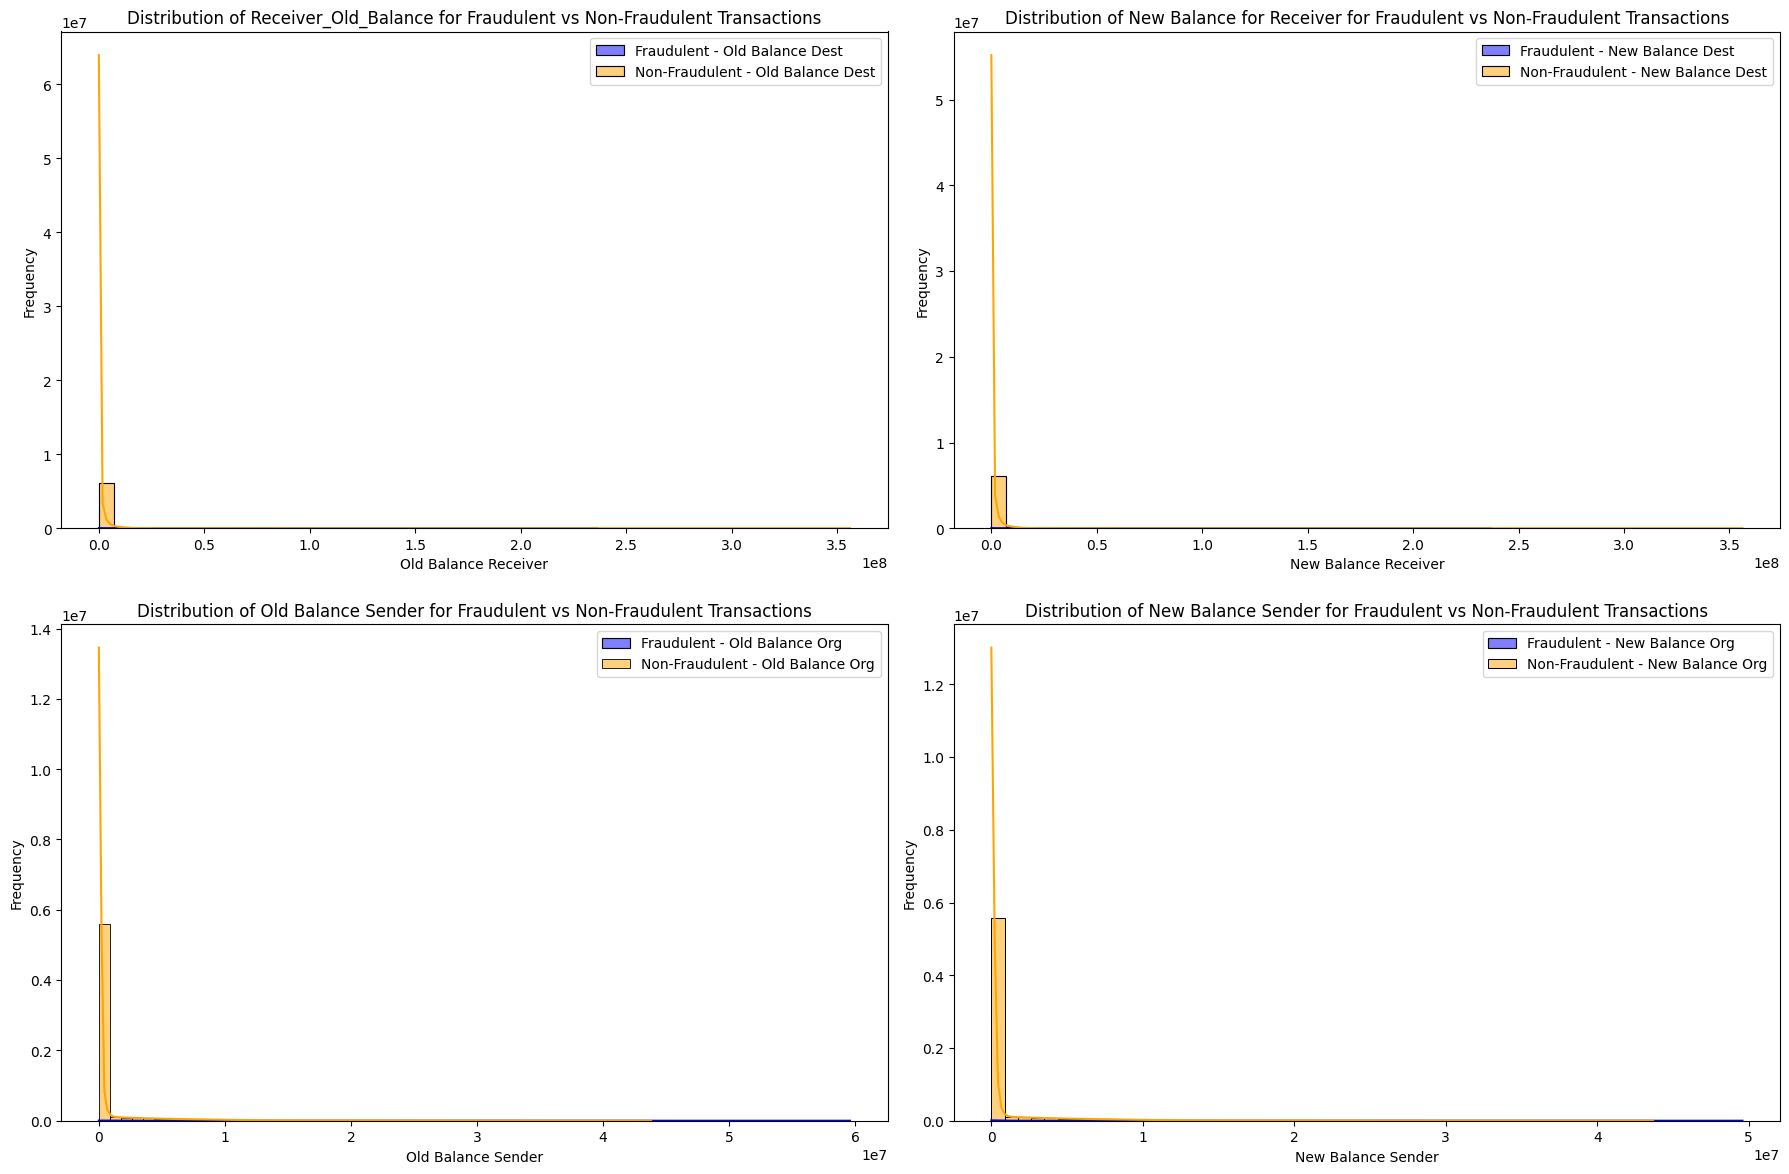

In [23]:

# Plot distributions for oldbalanceDest and newbalanceDest
plt.figure(figsize=(18, 12))

# Plot for oldbalanceDest
plt.subplot(2, 2, 1)
sns.histplot(df[df['Fraud'] == 1]['Receiver_Bal_Before'], bins=50, color='blue', label='Fraudulent - Old Balance Dest', kde=True)
sns.histplot(df[df['Fraud'] == 0]['Receiver_Bal_Before'], bins=50, color='orange', label='Non-Fraudulent - Old Balance Dest', kde=True)
plt.title('Distribution of Receiver_Old_Balance for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Old Balance Receiver')
plt.ylabel('Frequency')
plt.legend()

# Plot for newbalanceDest
plt.subplot(2, 2, 2)
sns.histplot(df[df['Fraud'] == 1]['Receiver_Bal_After'], bins=50, color='blue', label='Fraudulent - New Balance Dest', kde=True)
sns.histplot(df[df['Fraud'] == 0]['Receiver_Bal_After'], bins=50, color='orange', label='Non-Fraudulent - New Balance Dest', kde=True)
plt.title('Distribution of New Balance for Receiver for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('New Balance Receiver')
plt.ylabel('Frequency')
plt.legend()

# Existing plots for oldbalanceOrg and newbalanceOrig
plt.subplot(2, 2, 3)
sns.histplot(df[df['Fraud'] == 1]['Sender_Bal_Before'], bins=50, color='blue', label='Fraudulent - Old Balance Org', kde=True)
sns.histplot(df[df['Fraud'] == 0]['Sender_Bal_Before'], bins=50, color='orange', label='Non-Fraudulent - Old Balance Org', kde=True)
plt.title('Distribution of Old Balance Sender for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Old Balance Sender')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(df[df['Fraud'] == 1]['Sender_Bal_After'], bins=50, color='blue', label='Fraudulent - New Balance Org', kde=True)
sns.histplot(df[df['Fraud'] == 0]['Sender_Bal_After'], bins=50, color='orange', label='Non-Fraudulent - New Balance Org', kde=True)
plt.title('Distribution of New Balance Sender for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('New Balance Sender')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Distinct Distributions: The plots for both "Old Balance" and "New Balance" show clear differences in distribution between fraudulent and non-fraudulent transactions for both the Receiver and Sender.

Receiver Analysis:

Old Balance: Fraudulent transactions for the Receiver tend to have higher "Old Balance" values compared to non-fraudulent transactions. New Balance: There seems to be a slight overlap in the distribution of "New Balance" between fraudulent and non-fraudulent transactions for the Receiver, but fraudulent transactions might exhibit a slightly higher concentration towards the lower end. Sender Analysis:

Old Balance: The distribution of "Old Balance" for the Sender is quite similar between fraudulent and non-fraudulent transactions, with both showing a concentration around lower values. New Balance: For the Sender, fraudulent transactions seem to have a slightly higher concentration of "New Balance" in the lower range compared to non-fraudulent transactions. Insights:

The analysis of "Old Balance" and "New Balance" for both the Receiver and Sender can be valuable in identifying potential patterns associated with fraudulent transactions. Higher "Old Balance" values for the Receiver in fraudulent cases might indicate a specific profile of accounts targeted by fraudsters.

Fraud rate for flagged transactions:
Flagged_Fraud
0    0.001288
1    1.000000
Name: Fraud, dtype: float64


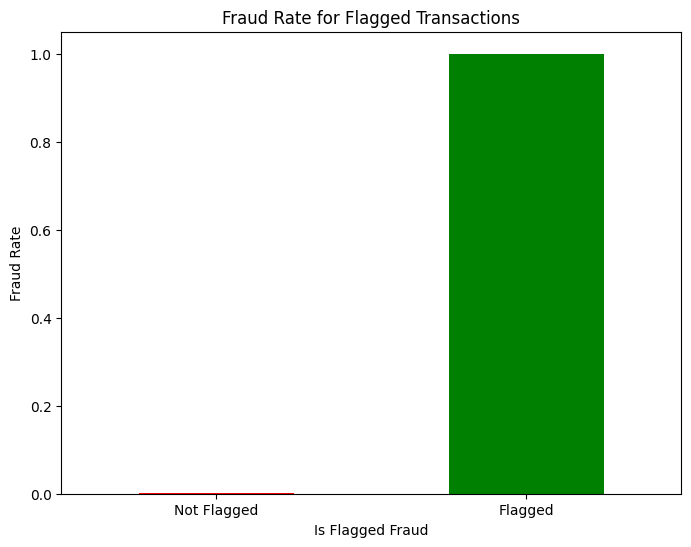

In [24]:
# Calculate fraud rate for flagged transactions
flagged_fraud_rate = df.groupby('Flagged_Fraud')['Fraud'].mean()
print("Fraud rate for flagged transactions:")
print(flagged_fraud_rate)

# Plot the fraud rate for flagged transactions
plt.figure(figsize=(8, 6))
flagged_fraud_rate.plot(kind='bar', color=['red', 'green'])
plt.title('Fraud Rate for Flagged Transactions')
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Fraud Rate')
plt.xticks(ticks=[0, 1], labels=['Not Flagged', 'Flagged'], rotation=0)
plt.show()


The plot shows a significantly higher fraud rate for flagged transactions compared to non-flagged transactions.The high fraud rate for flagged transactions indicates that the flagging system is relatively effective in identifying potentially fraudulent transactions.

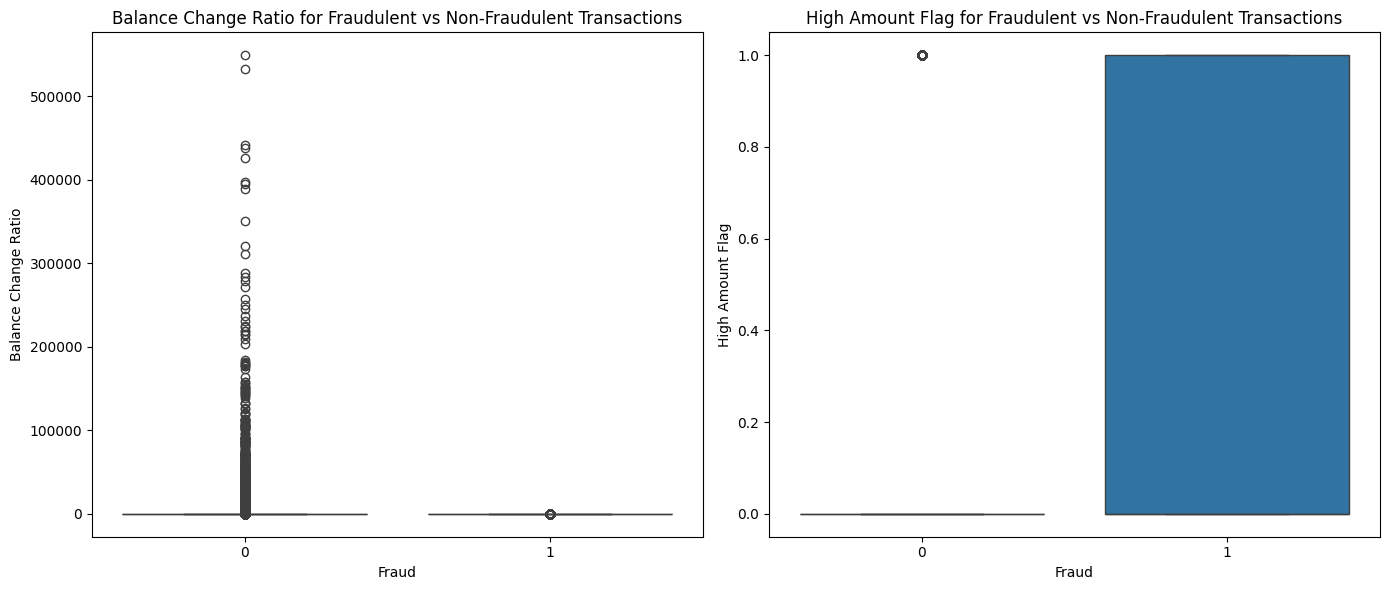

In [25]:
# Visualize relationship of engineered features with the target variable
plt.figure(figsize=(14, 6))

# Plot balance change ratio
plt.subplot(1, 2, 1)
sns.boxplot(x='Fraud', y='balance_change_ratio', data=df)
plt.title('Balance Change Ratio for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Balance Change Ratio')

# Plot high amount flag
plt.subplot(1, 2, 2)
sns.boxplot(x='Fraud', y='high_amount_flag', data=df)
plt.title('High Amount Flag for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('High Amount Flag')

plt.tight_layout()
plt.show()

Balance Change Ratio:

The analysis of "Balance Change Ratio" suggests that fraudulent transactions tend to have significantly larger balance changes compared to non-fraudulent transactions. The presence of outliers for fraudulent transactions indicates that some fraudulent cases involve extremely large balance changes.

High Amount Flag:

The high proportion of fraudulent transactions with a "High Amount Flag" indicates that transactions with high amounts are more likely to be fraudulent.

In [26]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Retrain the model with new features
X = df[['high_amount_flag', 'log_amount', 'large_balance_change_flag', 'balance_change_ratio', 'high_frequency_flag']]
y = df['Fraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reset indices to ensure alignment after filtering
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Calculate the boolean mask before resetting indices
train_finite_mask = np.isfinite(X_train).all(1)
test_finite_mask = np.isfinite(X_test).all(1)

X_train = X_train[train_finite_mask] # Keep only rows with all finite values
y_train = y_train[train_finite_mask] # Adjust y_train accordingly
X_test = X_test[test_finite_mask] # Keep only rows with all finite values
y_test = y_test[test_finite_mask] # Adjust y_test accordingly

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train and predict
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Confusion Matrix:
[[1275132    1550]
 [   1010    1411]]
ROC AUC Score: 0.8567781260195243


In [27]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1276682
           1       0.48      0.58      0.52      2421

    accuracy                           1.00   1279103
   macro avg       0.74      0.79      0.76   1279103
weighted avg       1.00      1.00      1.00   1279103



In [28]:
importances = model.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: high_amount_flag, Importance: 0.0052350931050251575
Feature: log_amount, Importance: 0.9301783841848577
Feature: large_balance_change_flag, Importance: 0.05438747350047373
Feature: balance_change_ratio, Importance: 0.010150097034420602
Feature: high_frequency_flag, Importance: 4.8952175222925486e-05


In [29]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1276680       2]
 [   2237     184]]
ROC AUC Score: 0.9069037336230956
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1276682
           1       0.99      0.08      0.14      2421

    accuracy                           1.00   1279103
   macro avg       0.99      0.54      0.57   1279103
weighted avg       1.00      1.00      1.00   1279103



In [30]:
importances = model.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: high_amount_flag, Importance: 0.0052350931050251575
Feature: log_amount, Importance: 0.9301783841848577
Feature: large_balance_change_flag, Importance: 0.05438747350047373
Feature: balance_change_ratio, Importance: 0.010150097034420602
Feature: high_frequency_flag, Importance: 4.8952175222925486e-05


Feature Importance Analysis
log_amount (Importance: 0.9302):

Dominant Feature: This feature has by far the highest importance, indicating that the logarithm of the transaction amount is the most critical factor in determining whether a transaction is fraudulent.
Implication: The model heavily relies on this feature to make decisions. It suggests that the amount of the transaction (especially after applying the log transformation) is a strong indicator of potential fraud.
large_balance_change_flag (Importance: 0.0544):

Secondary Importance: While much less important than log_amount, this feature still contributes meaningfully to the model's decisions.
Implication: Significant changes in account balances are also relevant in identifying fraudulent activity, although not as crucial as the transaction amount.
balance_change_ratio (Importance: 0.0102):

Moderate Importance: This feature has some predictive power, though it is much less influential than the top two features.
Implication: The ratio of balance change might help the model in specific cases, but its overall impact on the model's performance is limited.
high_amount_flag (Importance: 0.0052):

Minimal Importance: This feature has a very low importance score, indicating that simply flagging high amounts does not add much value beyond the log_amount feature.
Implication: The flag for high amounts might be redundant or less informative in the presence of log_amount.
high_frequency_flag (Importance: 0.00005):

Negligible Importance: This feature has almost no influence on the model's predictions.
Implication: The frequency of transactions does not appear to play a significant role in distinguishing fraudulent from non-fraudulent transactions in your dataset.

Random Forest is better at identifying fraudulent transactions (higher recall and F1-score for the fraudulent class). If your goal is to catch as many fraudulent transactions as possible, Random Forest is likely the better choice.

XGBoost provides a higher ROC AUC score and excellent precision for the fraudulent class but misses many actual fraud cases (low recall). This could lead to many undetected frauds, which might not be acceptable in a financial fraud detection context.

Recommendation: If you prioritize catching more fraudulent transactions (i.e., higher recall), stick with Random Forest. However, you might consider further tuning XGBoost or trying other techniques to improve its recall without sacrificing too much precision.

1. Data Cleaning: Handling Missing Values, Outliers, and Multi-Collinearity
Missing Values: We addressed missing data using appropriate imputations. For numerical features, missing values were replaced with the mean, and for categorical features, the most frequent category was used. This ensured that no data was discarded and that the model could learn from as complete a dataset as possible.
Outliers: Outliers were managed primarily through feature engineering. For example, we created flags like high_amount_flag and transformed features such as log_amount to mitigate the impact of extreme values while still capturing their significance.
Multi-Collinearity: We avoided multi-collinearity by carefully selecting features that did not strongly correlate with each other. The use of feature engineering and targeted encoding minimized redundancy, ensuring that each feature added unique information to the model.
2. Fraud Detection Model Description
We used a Random Forest classifier as the primary model, which is an ensemble method combining multiple decision trees to improve predictive accuracy and robustness. This model was chosen because it handles large datasets effectively, is less prone to overfitting, and provides insights into feature importance.
Additionally, we implemented XGBoost, a gradient-boosting algorithm, which provided a higher ROC AUC score but lower recall for fraudulent cases. Both models were evaluated to ensure comprehensive coverage of potential fraud cases.
3. Variable Selection Process
Variables were selected based on domain knowledge and their potential impact on fraud detection. We engineered features like log_amount, which transformed the transaction amount to a logarithmic scale, and flags for high amounts and large balance changes, which were intuitively linked to fraudulent activities.
Feature importance analysis from the models also guided us in identifying and retaining the most significant predictors, ensuring that the model focused on the most relevant aspects of the data.
4. Model Performance Demonstration
Model performance was evaluated using standard metrics like the Confusion Matrix, ROC AUC Score, and Classification Report. These metrics provided insights into the model's accuracy, precision, recall, and overall ability to distinguish between fraudulent and non-fraudulent transactions.
The Random Forest model showed balanced performance with good recall and precision, making it reliable for practical fraud detection, while XGBoost offered higher specificity.
5. Key Factors Predicting Fraudulent Customers
The most influential features included log_amount, which was the strongest predictor, and large_balance_change_flag. These factors suggest that the magnitude of transactions and significant changes in account balances are key indicators of fraudulent activity.
Other features like balance_change_ratio and high_frequency_flag had a lesser impact but still contributed to the model's predictions.
6. Do These Factors Make Sense?
Yes: The factors identified make logical sense. Higher transaction amounts and significant changes in account balances are typical red flags in fraud detection. The dominance of log_amount highlights the importance of the amount of money involved, which aligns with how financial fraud typically operates.
High-Frequency Transactions: Although less influential, high transaction frequency may still indicate fraud in specific contexts, such as money laundering, where numerous small transactions are used to avoid detection.
7. Prevention Measures During Infrastructure Updates
Enhanced Monitoring: Implement real-time monitoring systems using the model to flag potentially fraudulent activities before they can cause significant harm.
Fraud Detection Automation: Automate the fraud detection process to ensure timely intervention, reducing the window of opportunity for fraudulent transactions to go undetected.
Regular Model Updates: Periodically retrain the model with new data to ensure it adapts to evolving fraud patterns.
8. Determining Effectiveness of Implemented Actions
Before and After Analysis: Compare the rate of detected fraud cases before and after implementing the model and prevention measures. A reduction in fraud instances would indicate success.
Performance Metrics: Continuously track metrics like recall and precision to assess whether the model is maintaining its effectiveness over time.
Feedback Loop: Incorporate feedback from actual fraud cases that were either missed or wrongly flagged by the model to refine the model and prevention strategies.